## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1          X2        X3         X4         Y
0  50.413456  806.846248  0.367545   9.219006  1.428887
1  87.567594  449.476990  0.680608   8.534812  1.285782
2  73.284896  180.931192  0.947306   2.906283  1.117800
3   6.404024  749.163087  0.964568  10.175421  1.471650
4  84.117389  306.663816  0.840989   2.092661  1.412043


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0106218	total: 69.3ms	remaining: 1m 9s
1:	learn: 1.0007281	total: 70.1ms	remaining: 35s
2:	learn: 0.9915057	total: 70.6ms	remaining: 23.4s
3:	learn: 0.9821883	total: 71.1ms	remaining: 17.7s
4:	learn: 0.9738043	total: 71.7ms	remaining: 14.3s
5:	learn: 0.9637979	total: 72.3ms	remaining: 12s
6:	learn: 0.9544445	total: 72.9ms	remaining: 10.3s
7:	learn: 0.9439140	total: 73.5ms	remaining: 9.11s
8:	learn: 0.9346847	total: 74ms	remaining: 8.15s
9:	learn: 0.9264605	total: 74.6ms	remaining: 7.38s
10:	learn: 0.9164940	total: 75ms	remaining: 6.75s
11:	learn: 0.9081989	total: 75.5ms	remaining: 6.21s
12:	learn: 0.8998453	total: 76ms	remaining: 5.77s
13:	learn: 0.8922836	total: 76.4ms	remaining: 5.38s
14:	learn: 0.8833966	total: 77ms	remaining: 5.06s
15:	learn: 0.8735877	total: 77.4ms	remaining: 4.76s
16:	learn: 0.8655286	total: 77.9ms	remaining: 4.5s
17:	learn: 0.8555683	total: 78.3ms	remaining: 4.27s
18:	learn: 0.8478147	total: 78.8ms	remaining: 4.07s
19:	l

85:	learn: 0.4756749	total: 109ms	remaining: 1.15s
86:	learn: 0.4741477	total: 109ms	remaining: 1.14s
87:	learn: 0.4711450	total: 109ms	remaining: 1.13s
88:	learn: 0.4675318	total: 110ms	remaining: 1.13s
89:	learn: 0.4637776	total: 110ms	remaining: 1.12s
90:	learn: 0.4604233	total: 111ms	remaining: 1.11s
91:	learn: 0.4571417	total: 111ms	remaining: 1.1s
92:	learn: 0.4537127	total: 112ms	remaining: 1.09s
93:	learn: 0.4504986	total: 112ms	remaining: 1.08s
94:	learn: 0.4469022	total: 112ms	remaining: 1.07s
95:	learn: 0.4440285	total: 113ms	remaining: 1.06s
96:	learn: 0.4406618	total: 113ms	remaining: 1.06s
97:	learn: 0.4377781	total: 114ms	remaining: 1.05s
98:	learn: 0.4349759	total: 114ms	remaining: 1.04s
99:	learn: 0.4313507	total: 115ms	remaining: 1.03s
100:	learn: 0.4282048	total: 115ms	remaining: 1.02s
101:	learn: 0.4248192	total: 115ms	remaining: 1.01s
102:	learn: 0.4213797	total: 116ms	remaining: 1.01s
103:	learn: 0.4180877	total: 116ms	remaining: 1000ms
104:	learn: 0.4149568	total

264:	learn: 0.1635040	total: 187ms	remaining: 519ms
265:	learn: 0.1625486	total: 188ms	remaining: 517ms
266:	learn: 0.1616740	total: 188ms	remaining: 516ms
267:	learn: 0.1607157	total: 188ms	remaining: 515ms
268:	learn: 0.1597752	total: 189ms	remaining: 513ms
269:	learn: 0.1592743	total: 189ms	remaining: 512ms
270:	learn: 0.1587951	total: 190ms	remaining: 510ms
271:	learn: 0.1581779	total: 190ms	remaining: 509ms
272:	learn: 0.1573667	total: 191ms	remaining: 507ms
273:	learn: 0.1567514	total: 191ms	remaining: 506ms
274:	learn: 0.1558431	total: 191ms	remaining: 505ms
275:	learn: 0.1550206	total: 192ms	remaining: 503ms
276:	learn: 0.1543856	total: 192ms	remaining: 502ms
277:	learn: 0.1536381	total: 193ms	remaining: 500ms
278:	learn: 0.1528925	total: 193ms	remaining: 499ms
279:	learn: 0.1522749	total: 194ms	remaining: 498ms
280:	learn: 0.1514257	total: 194ms	remaining: 496ms
281:	learn: 0.1505745	total: 194ms	remaining: 495ms
282:	learn: 0.1498552	total: 195ms	remaining: 494ms
283:	learn: 

501:	learn: 0.0745202	total: 291ms	remaining: 289ms
502:	learn: 0.0744605	total: 292ms	remaining: 288ms
503:	learn: 0.0742466	total: 292ms	remaining: 287ms
504:	learn: 0.0741269	total: 292ms	remaining: 287ms
505:	learn: 0.0739463	total: 293ms	remaining: 286ms
506:	learn: 0.0738883	total: 293ms	remaining: 285ms
507:	learn: 0.0735791	total: 294ms	remaining: 285ms
508:	learn: 0.0735369	total: 294ms	remaining: 284ms
509:	learn: 0.0732560	total: 295ms	remaining: 283ms
510:	learn: 0.0732142	total: 295ms	remaining: 283ms
511:	learn: 0.0730938	total: 296ms	remaining: 282ms
512:	learn: 0.0729416	total: 296ms	remaining: 281ms
513:	learn: 0.0727381	total: 297ms	remaining: 281ms
514:	learn: 0.0725638	total: 297ms	remaining: 280ms
515:	learn: 0.0724515	total: 298ms	remaining: 279ms
516:	learn: 0.0722532	total: 298ms	remaining: 278ms
517:	learn: 0.0721048	total: 299ms	remaining: 278ms
518:	learn: 0.0720647	total: 299ms	remaining: 277ms
519:	learn: 0.0719361	total: 300ms	remaining: 276ms
520:	learn: 

674:	learn: 0.0499834	total: 370ms	remaining: 178ms
675:	learn: 0.0498775	total: 370ms	remaining: 177ms
676:	learn: 0.0496682	total: 371ms	remaining: 177ms
677:	learn: 0.0494525	total: 371ms	remaining: 176ms
678:	learn: 0.0494231	total: 371ms	remaining: 176ms
679:	learn: 0.0493941	total: 372ms	remaining: 175ms
680:	learn: 0.0493656	total: 372ms	remaining: 174ms
681:	learn: 0.0491548	total: 373ms	remaining: 174ms
682:	learn: 0.0491068	total: 373ms	remaining: 173ms
683:	learn: 0.0490788	total: 374ms	remaining: 173ms
684:	learn: 0.0489039	total: 374ms	remaining: 172ms
685:	learn: 0.0487855	total: 375ms	remaining: 171ms
686:	learn: 0.0487578	total: 375ms	remaining: 171ms
687:	learn: 0.0487111	total: 375ms	remaining: 170ms
688:	learn: 0.0485301	total: 376ms	remaining: 170ms
689:	learn: 0.0485029	total: 376ms	remaining: 169ms
690:	learn: 0.0484761	total: 377ms	remaining: 168ms
691:	learn: 0.0482983	total: 377ms	remaining: 168ms
692:	learn: 0.0482718	total: 377ms	remaining: 167ms
693:	learn: 

914:	learn: 0.0294132	total: 474ms	remaining: 44ms
915:	learn: 0.0293113	total: 474ms	remaining: 43.5ms
916:	learn: 0.0292643	total: 475ms	remaining: 43ms
917:	learn: 0.0291989	total: 475ms	remaining: 42.4ms
918:	learn: 0.0291528	total: 476ms	remaining: 41.9ms
919:	learn: 0.0291064	total: 476ms	remaining: 41.4ms
920:	learn: 0.0290071	total: 477ms	remaining: 40.9ms
921:	learn: 0.0289612	total: 477ms	remaining: 40.4ms
922:	learn: 0.0288978	total: 477ms	remaining: 39.8ms
923:	learn: 0.0288526	total: 478ms	remaining: 39.3ms
924:	learn: 0.0288069	total: 478ms	remaining: 38.8ms
925:	learn: 0.0287135	total: 479ms	remaining: 38.3ms
926:	learn: 0.0286682	total: 479ms	remaining: 37.8ms
927:	learn: 0.0286064	total: 480ms	remaining: 37.2ms
928:	learn: 0.0285128	total: 480ms	remaining: 36.7ms
929:	learn: 0.0284529	total: 481ms	remaining: 36.2ms
930:	learn: 0.0283580	total: 481ms	remaining: 35.7ms
931:	learn: 0.0282995	total: 481ms	remaining: 35.1ms
932:	learn: 0.0282565	total: 482ms	remaining: 34.6

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

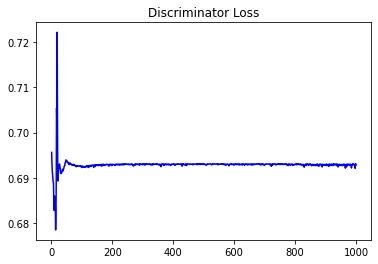

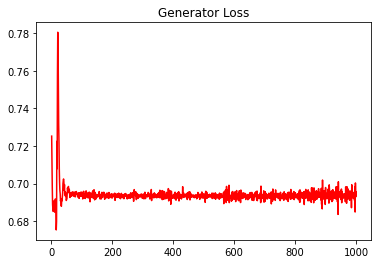

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.5783253807115835


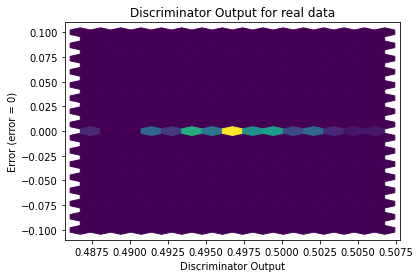

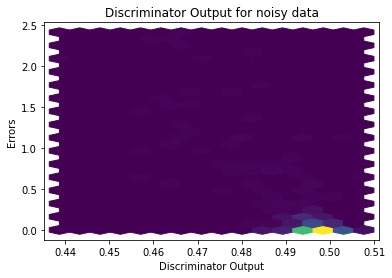

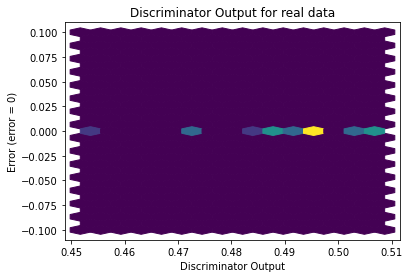

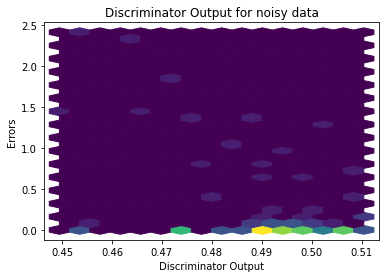

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


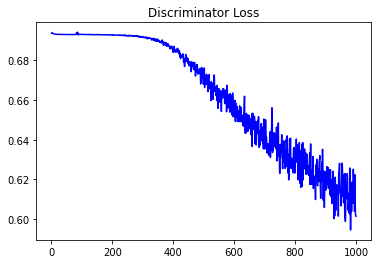

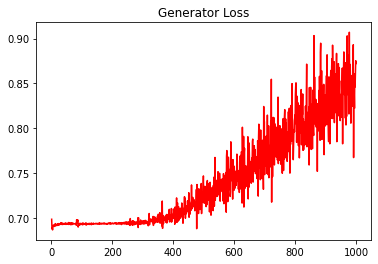

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.5130220282327929


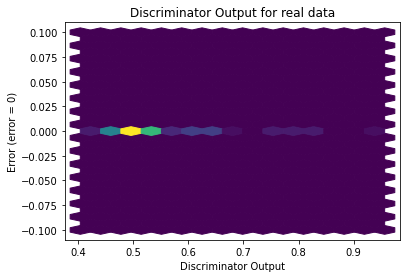

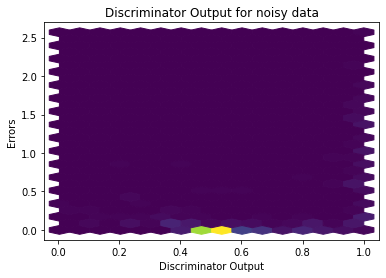

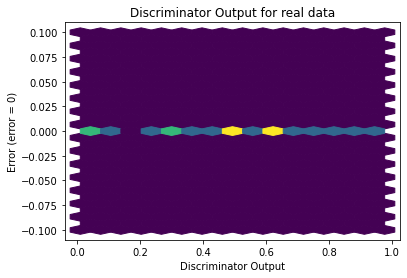

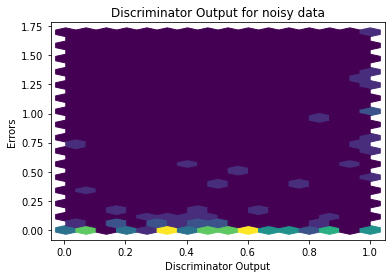

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
